<a href="https://colab.research.google.com/github/luisfernandorios/Actividades_Aprendizaje-/blob/main/IBM_Module__4_Model_Development.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#DATA ANALYSIS WITH PYTHON
#Semana 7
#Model Development

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway,pearsonr
from scipy import stats

In [ ]:
path='https://raw.githubusercontent.com/luisfernandorios/Actividades_Aprendizaje-/main/imports-85.data'
df= pd.read_csv(path,sep=',',header=None)
headers=['symboling','normalized-losses','make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','wheel-base','length','width','height','curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']
df.columns=headers
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [ ]:
df=df.replace('?',np.NaN)
df=df.dropna(subset=['price'],axis=0)
df['price']=df['price'].astype('int64')

In [ ]:
avg_horsepower = df['horsepower'].astype('float').mean(axis=0)
df['horsepower'].replace(np.nan, avg_horsepower, inplace=True)
df[['horsepower']]=df[['horsepower']].astype('float')

In [ ]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower           float64
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

In [ ]:
#SIMPLE AND 
from sklearn.linear_model import LinearRegression

In [ ]:
lm=LinearRegression()

In [ ]:
X=df[['highway-mpg']]
y=df['price']

In [ ]:
lm.fit(X,y)

LinearRegression()

In [ ]:
yhat=lm.predict(X)

In [ ]:
lm.intercept_

38423.305858157386

In [ ]:
lm.coef_

array([-821.73337832])

In [ ]:
# The Relationship between Price and Highway MPG is given by this equation in bold: “Price
# = 38,423.31 minus 821.73 times highway mpg”

In [ ]:
Z=df[['horsepower','curb-weight','engine-size','highway-mpg']]


In [ ]:
lm.fit(Z,y)

LinearRegression()

In [ ]:
yhat=lm.predict(Z)

In [ ]:
lm.coef_

array([53.61042729,  4.70886444, 81.47225667, 36.39637823])

In [ ]:
lm.intercept_

-15824.038208234473

(0.0, 48181.089312554046)

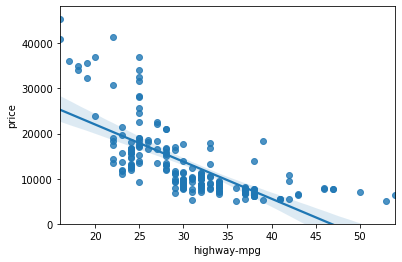

In [ ]:
#REGRESSION PLOTS
sns.regplot(x='highway-mpg',y='price',data=df)
plt.ylim(0,)

<AxesSubplot:xlabel='highway-mpg', ylabel='price'>

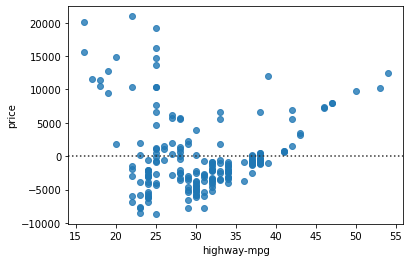

In [ ]:
sns.residplot(x=df['highway-mpg'],y=df['price'])

C:\Users\LRIOSPIE\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\LRIOSPIE\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

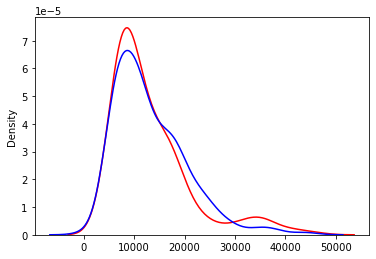

In [ ]:
#DISTRIBUTION PLOTS
ax1=sns.distplot(x=df['price'],hist=False,color='r',label='Actual Value')
sns.distplot(yhat,hist=False,color='b',label='Fitted Values', ax=ax1)

In [ ]:
#POLYNOMIAL REGRESSION
f=np.polyfit(np.ravel(X),y,3)
p=np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
pr=PolynomialFeatures(degree=2,include_bias=False)

In [ ]:
x_polly=pr.fit_transform(df[['horsepower','curb-weight']])

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
SCALE=StandardScaler()

In [ ]:
SCALE.fit(df[['horsepower','highway-mpg']])

StandardScaler()

In [ ]:
x_scale=SCALE.transform(df[['horsepower','highway-mpg']])

In [ ]:
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline

In [ ]:
Input=[('scale',StandardScaler()),('polnomial',PolynomialFeatures(degree=2)),('model',LinearRegression())]
pipe=Pipeline(Input)

In [ ]:
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polnomial', PolynomialFeatures()),
                ('model', LinearRegression())])

In [ ]:
yhat=pipe.predict(Z)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
lm.fit(X,y)

LinearRegression()

In [ ]:
lm.score(X,y)

0.4965911884339175

In [ ]:
lm.coef_

array([-821.73337832])

In [ ]:
lm.predict([[30]])

C:\Users\LRIOSPIE\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13771.3045085])

In [ ]:
new_input=np.arange(1,101,1).reshape(-1,1)

In [ ]:
yhat=lm.predict(new_input)
yhat[:]

C:\Users\LRIOSPIE\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([ 37601.57247984,  36779.83910151,  35958.10572319,  35136.37234487,
        34314.63896655,  33492.90558823,  32671.1722099 ,  31849.43883158,
        31027.70545326,  30205.97207494,  29384.23869662,  28562.50531829,
        27740.77193997,  26919.03856165,  26097.30518333,  25275.57180501,
        24453.83842668,  23632.10504836,  22810.37167004,  21988.63829172,
        21166.9049134 ,  20345.17153508,  19523.43815675,  18701.70477843,
        17879.97140011,  17058.23802179,  16236.50464347,  15414.77126514,
        14593.03788682,  13771.3045085 ,  12949.57113018,  12127.83775186,
        11306.10437353,  10484.37099521,   9662.63761689,   8840.90423857,
         8019.17086025,   7197.43748192,   6375.7041036 ,   5553.97072528,
         4732.23734696,   3910.50396864,   3088.77059031,   2267.03721199,
         1445.30383367,    623.57045535,   -198.16292297,  -1019.8963013 ,
        -1841.62967962,  -2663.36305794,  -3485.09643626,  -4306.82981458,
        -5128.5631929 ,  

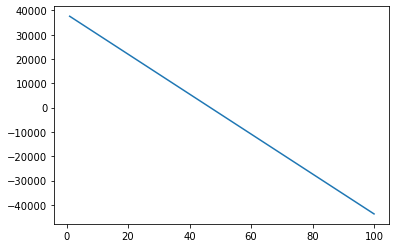

In [ ]:
plt.plot(new_input, yhat)
plt.show()

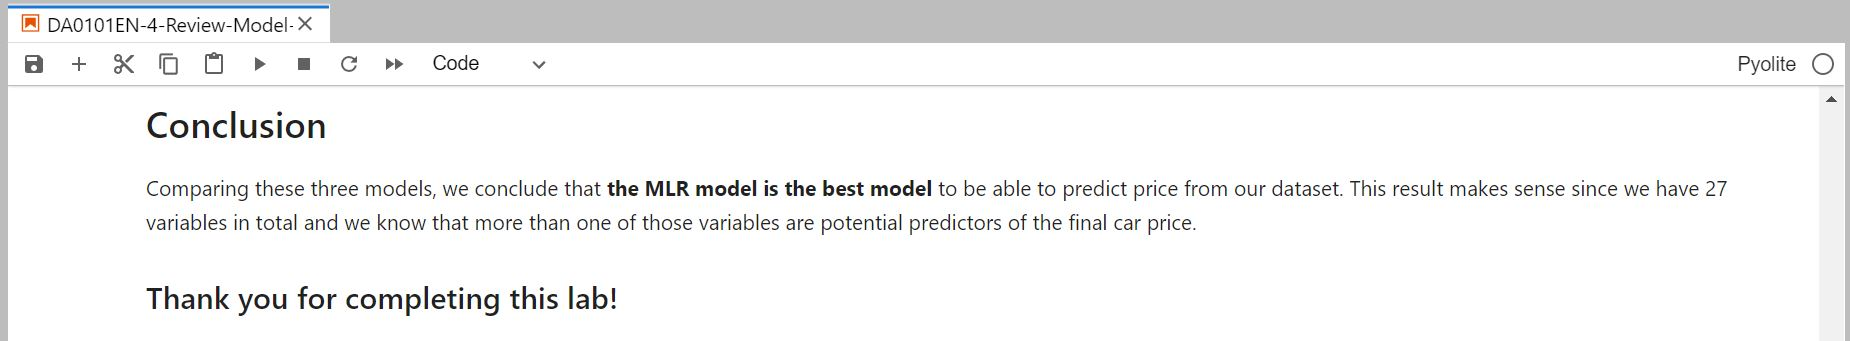

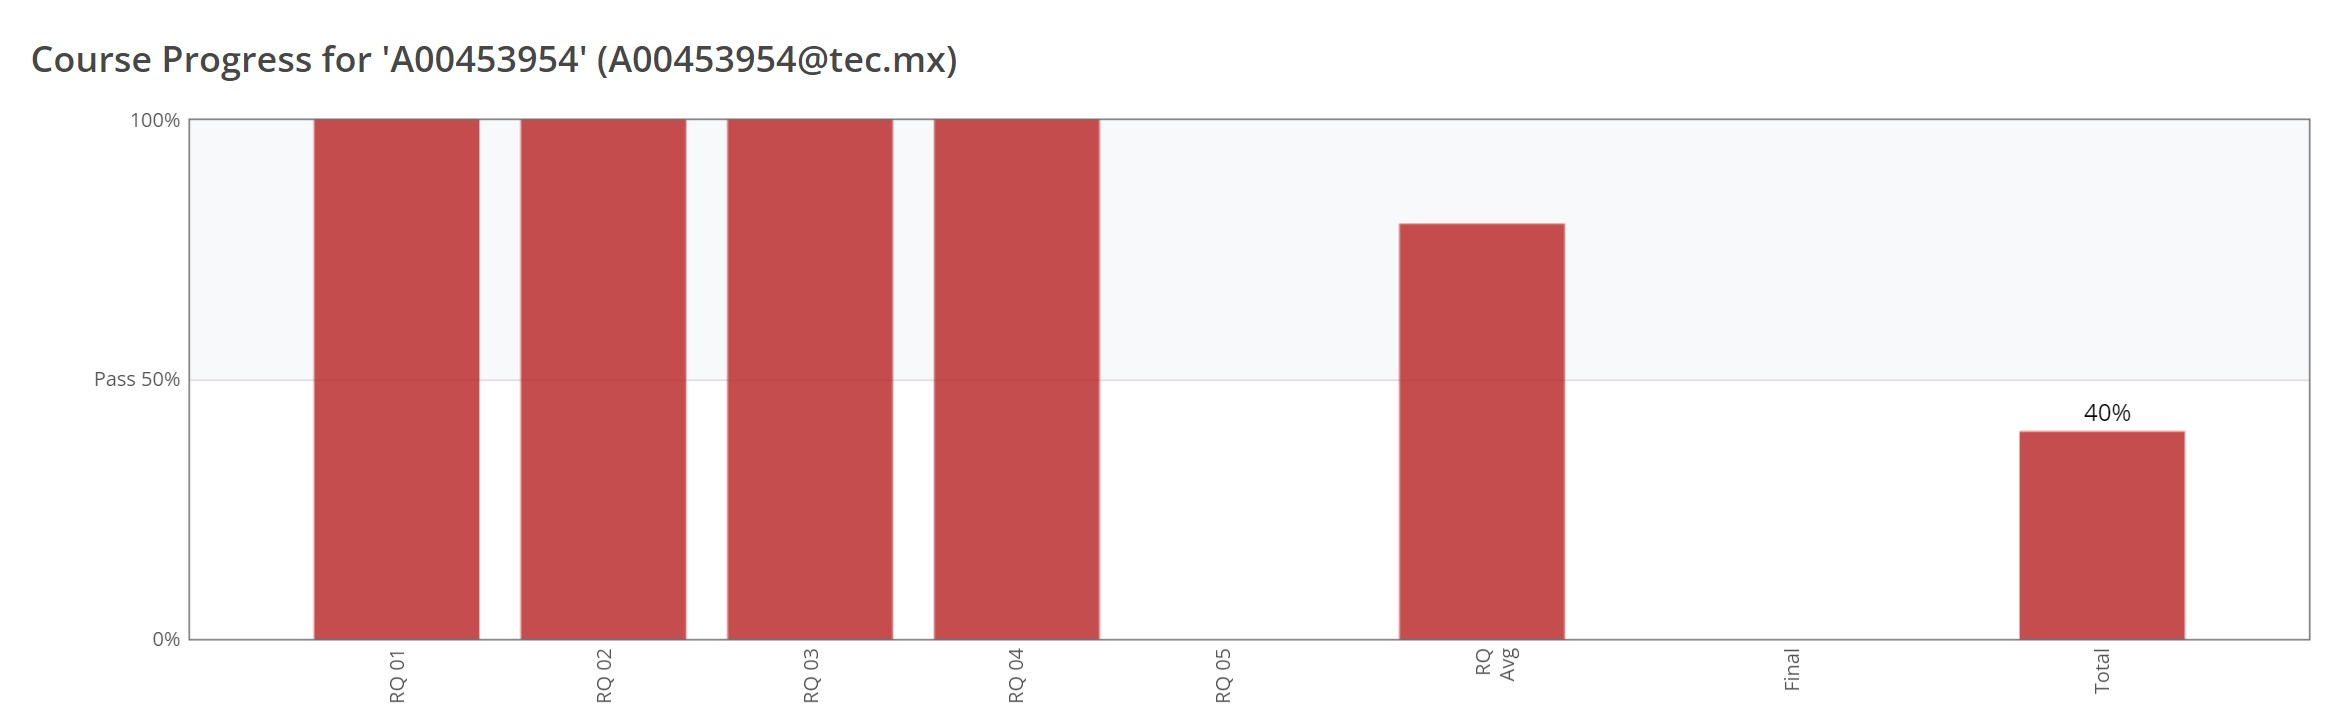